In [1]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

transform = ToTensor()
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

In [2]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

Images shape: torch.Size([32, 1, 28, 28]), labels shape: torch.Size([32])


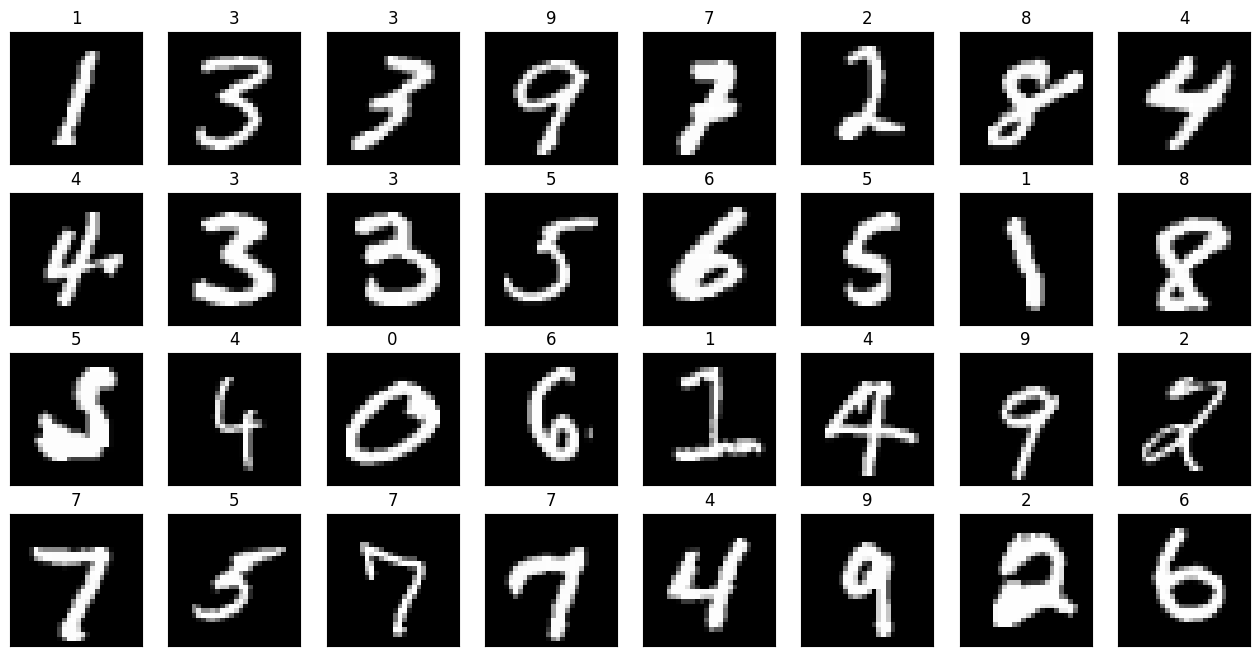

In [3]:
batch = next(iter(train_loader))
images, labels = batch

print(f'Images shape: {images.shape}, labels shape: {labels.shape}')

# plot the 32 images in the batch, along with their labels
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
for i in range(32):
  ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(images[i].squeeze(), cmap='gray')
  ax.set_title(labels[i].item())

In [4]:
from torch import nn

class DenseNetwork(nn.Module):
  '''Network with all dense layers'''
  def __init__(self):
    super().__init__()
    # defining flatten, activation and output functions 
    self.flatten = nn.Flatten()
    self.activation_function = nn.ReLU()
    self.output_function = nn.Softmax(dim=1)
    # defining the layers
    self.hidden_layer_1 = nn.Linear(28 * 28, 128)
    self.hidden_layer_2 = nn.Linear(128, 128)
    self.output_layer = nn.Linear(128, 10)
  
  def forward(self, x):
    x = self.flatten(x)
    x = self.hidden_layer_1(x)
    x = self.activation_function(x)
    x = self.hidden_layer_2(x)
    x = self.activation_function(x)
    x = self.output_layer(x)
    x = self.output_function(x)
    return x

In [5]:
import torch

device = (
  'cuda'
  if torch.cuda.is_available()
  else 'mps'
  if torch.backends.mps.is_available()
  else 'cpu'
)

device

'mps'

In [6]:
model = DenseNetwork().to(device)
print(model)

DenseNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (activation_function): ReLU()
  (output_function): Softmax(dim=1)
  (hidden_layer_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer_2): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
from torch.optim import Adam
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 20

for current_epoch in range(epochs):
  for batch in train_loader:
    images, labels = batch
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    predictions = model(images)
    loss = loss_function(predictions, labels)
    loss.backward()
    optimizer.step()
    print(f'Epoch {current_epoch}: loss: {loss.item()}')

Epoch 0: loss: 2.302096366882324
Epoch 0: loss: 2.300685405731201
Epoch 0: loss: 2.2975821495056152
Epoch 0: loss: 2.297431707382202
Epoch 0: loss: 2.2959792613983154
Epoch 0: loss: 2.28912353515625
Epoch 0: loss: 2.2912631034851074
Epoch 0: loss: 2.2856905460357666
Epoch 0: loss: 2.2849373817443848
Epoch 0: loss: 2.284238815307617
Epoch 0: loss: 2.2662439346313477
Epoch 0: loss: 2.2599682807922363
Epoch 0: loss: 2.2512898445129395
Epoch 0: loss: 2.255910634994507
Epoch 0: loss: 2.2547030448913574
Epoch 0: loss: 2.2210822105407715
Epoch 0: loss: 2.223137378692627
Epoch 0: loss: 2.207122802734375
Epoch 0: loss: 2.156411647796631
Epoch 0: loss: 2.2153944969177246
Epoch 0: loss: 2.1874887943267822
Epoch 0: loss: 2.2071609497070312
Epoch 0: loss: 2.133275270462036
Epoch 0: loss: 2.159034013748169
Epoch 0: loss: 2.187551736831665
Epoch 0: loss: 2.1081180572509766
Epoch 0: loss: 2.0737032890319824
Epoch 0: loss: 2.065159559249878
Epoch 0: loss: 2.092967987060547
Epoch 0: loss: 2.035115718841

In [9]:
model.eval()
with torch.no_grad():
  correct, total = 0, 0
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  accuracy = correct / total
  print(f'Total: {total}')
  print(f'Correct: {correct}')
  print(f'Accuracy: {accuracy: .2%}')

Total: 10000
Correct: 9718
Accuracy:  97.18%


In [10]:
postfix = str(round(accuracy * 1e4))
save_name = f'model_{postfix}.pth'
torch.save(model, f'./models/{save_name}')
# save model state to be loaded later
torch.save(model.state_dict(), f'./models/{save_name}.state_dict')